In [3]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define kernels
kernels = {
    "Blur": np.ones((5, 5), np.float32) / 25,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Horizontal Derivative (Sobel X)": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Vertical Derivative (Sobel Y)": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16,
    "Laplacian Edge Detection": np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    "Custom Edge Detection": np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
}

# Define utility functions
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        print("Error: Image not found.")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    resized = cv2.resize(image, (width, height))
    return resized

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def apply_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def blend_kernels(image, kernels, kernel1, kernel2):
    # Check if the provided kernel keys exist in the kernels dictionary
    if kernel1 not in kernels or kernel2 not in kernels:
        raise Exception("One or both of the provided kernels do not exist. Please review your input.")
    # Apply the kernels
    image1 = apply_kernel(image, kernels[kernel1])
    image2 = apply_kernel(image, kernels[kernel2])
    # Blend the images
    blended_image = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
    # Return the blended image
    return blended_image


def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Junbeom\AppData\Local\Temp\ipykernel_20248\4142178011.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_paths = ["D:\Project\ComVi\images\Taj_Mahal.jpg", "D:\Project\ComVi\images\coffee_view.jpeg"]
C:\Users\Junbeom\AppData\Local\Temp\ipykernel_20248\4142178011.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_paths = ["D:\Project\ComVi\images\Taj_Mahal.jpg", "D:\Project\ComVi\images\coffee_view.jpeg"]


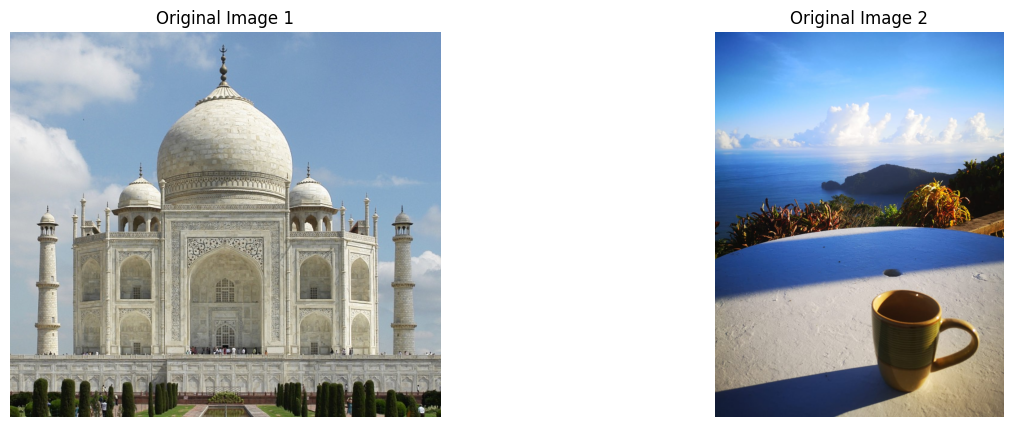

In [4]:
# Load and display multiple images
image_paths = ["D:\Project\ComVi\images\Taj_Mahal.jpg", "D:\Project\ComVi\images\coffee_view.jpeg"]
original_images = [load_image(path) for path in image_paths]

# Display the images with individual titles
display_images(original_images, ["Original Image 1", "Original Image 2"], cmap=None)


ส่วนที่ 1: เปรียบเทียบการ Resizing ที่มีผลต่อการ Convolution

- ให้นักศึกษาโหลดภาพที่กำหนดมาให้และปรับขนาดภาพในหลายขนาด เช่น 25%, 50%, และ 75% แล้วแปลงภาพเหล่านั้นเป็นภาพ Grayscale
- ให้นักศึกษานำ Kernel "Edge Detection" มาใช้กับแต่ละขนาดภาพ แล้วสังเกตความแตกต่างที่เกิดขึ้น

In [ ]:
resize = [25, 50, 75]
for image in original_images:
    grayscale_images = []
    title1 = []
    edge_detections = []
    title2 = []
    for percent in resize:
        resized = resize_image(image, percent)
        grayscale = convert_to_grayscale(resized)
        grayscale_images.append(grayscale)
        title1.append(f"Grayscale Image {percent}%, shape {grayscale.shape}")
        edge_detection = apply_kernel(resized, kernels["Edge Detection"])
        edge_detections.append(edge_detection)
        title2.append(f"Edge Detection Image {percent}%, shape {edge_detection.shape}")
    display_images(grayscale_images, title1, cmap='gray')
    display_images(edge_detections, title2, cmap='gray')

ส่วนที่ 2: สร้างการเปรียบเทียบของ Kernels ที่หลากหลาย

- ให้นักศึกษาเลือก Kernel ที่สนใจ 3 ชนิด แล้วนำไปใช้กับภาพ Grayscale ขนาดต่างๆ และเปรียบเทียบผลลัพธ์ เช่นเปรียบเทียบ "Emboss" กับ "Gaussian Blur" กับ "Sharpen" และอธิบายความแตกต่างในรูปภาพที่ได้ในแต่ละกรณี

In [ ]:
resize = [25, 50, 75]
for image in original_images:
    resized_images = []
    blur_images = []
    sharpen_images = []
    gaussian_blur_images = []
    blur_titles = []
    sharpen_titles = []
    gaussian_blur_titles = []
    for percent in resize:
        resized = resize_image(image, percent)
        blur = apply_kernel(resized, kernels["Blur"])
        sharpen = apply_kernel(resized, kernels["Sharpen"])
        gaussian_blur = apply_kernel(resized, kernels["Gaussian Blur"])
        blur_images.append(blur)
        sharpen_images.append(sharpen)
        gaussian_blur_images.append(gaussian_blur)
        blur_titles.append(f"Blur Image {percent}%")
        sharpen_titles.append(f"Sharpen Image {percent}%")
        gaussian_blur_titles.append(f"Gaussian Blur Image {percent}%")
    display_images(blur_images, blur_titles, cmap=None)
    display_images(sharpen_images, sharpen_titles, cmap=None)
    display_images(gaussian_blur_images, gaussian_blur_titles, cmap=None)

ส่วนที่ 3: สร้างและทดลอง Kernel แบบ Custom

- ให้นักศึกษาออกแบบ Kernel ของตนเอง (เช่น อาจมีขนาด 3x3 หรือ 5x5) อาจจะใช้ chatgpt สร้าง kernel ชนิดใหม่ขึ้นมา และทดลองใช้งาน Kernel นี้กับภาพเดิม โดยอธิบายผลที่ได้ว่าทำให้เกิดการเปลี่ยนแปลงแบบใด

In [ ]:
for image in original_images:
    custom_edge_images = []
    titles = []
    for percent in resize:
        resized = resize_image(image, percent)
        custom_edge = apply_kernel(resized, kernels["Custom Edge Detection"])
        custom_edge_images.append(custom_edge)
        titles.append(f"Custom Edge Detection Image {percent}%, shape {custom_edge.shape}")
    display_images(custom_edge_images, titles, cmap=None)

ส่วนที่ 4: ทดลองทำ Image Blending หลังใช้ Convolution

- ให้นักศึกษานำภาพที่ได้จาก Convolution หลายภาพมา Blend หรือรวมกัน (เช่น นำภาพจาก Edge Detection กับ Gaussian Blur มารวมกัน) โดยการนำภาพมาบวกหรือลบกัน และเปรียบเทียบผลที่ได้

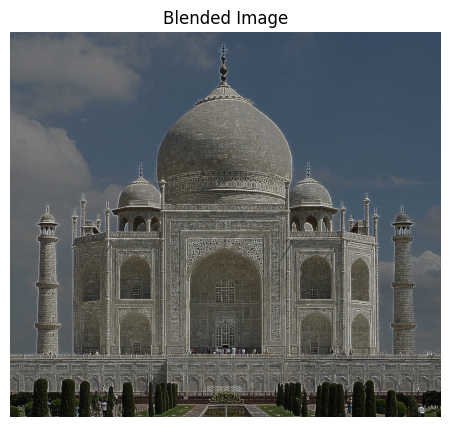

In [11]:
# In the setup, we assume that 'original_images' is your input image list, 
# and 'kernels' is the dictionary that contains all the kernels.

# Apply blending function with 'Edge Detection' and 'Gaussian Blur' kernels
blended_image = blend_kernels(original_images[0], kernels, "Edge Detection", "Gaussian Blur")


# Since the blend_kernels returns a single image, we wrap 'blended_image' with a list before passing it to 'display_images' function
display_images([blended_image], ["Blended Image"], cmap=None)